In [1]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split                                                                                                                                                                                                                                                                                                                                                                                              
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import numpy as np
import matplotlib as plt

import scipy.stats as stats

In [2]:
df_molecules = pd.read_csv('filtered_molecules.csv')
df_descriptors = df_molecules.drop("SMILES", axis=1)

In [12]:
# Function to check if a column contains only binary data
def is_binary_column(col):
    return col.dropna().isin([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).all()

print(is_binary_column(df_descriptors['qed']))

df_fr = pd.DataFrame()
df_non_binary = pd.DataFrame()
non_binary = []
# Check each column for binary data
for col in df_descriptors.columns:
    if is_binary_column(df_descriptors[col]):
        #df_non_binary[col].drop(col, axis=1)
        #df_non_binary = df_non_binary.drop(columns=[col])
        df_fr[col]=df_descriptors[col]
    else:
        non_binary.append(col)

print(non_binary)
df_non_binary[non_binary]=df_descriptors[non_binary]
df_non_binary.head()

False
['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', '

C:\Users\karli\AppData\Local\Temp\ipykernel_20076\962290950.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_non_binary[non_binary]=df_descriptors[non_binary]
C:\Users\karli\AppData\Local\Temp\ipykernel_20076\962290950.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_non_binary[non_binary]=df_descriptors[non_binary]
C:\Users\karli\AppData\Local\Temp\ipykernel_20076\962290950.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,MolLogP,MolMR
0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,58,...,11.341481,0.681481,0.000000,0.000000,5.415741,0.0,0.166667,11,0.06910,43.3598
1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,88,...,1.019575,0.590787,6.779888,0.000000,5.614552,0.0,0.153846,17,3.23272,67.7090
2,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,84,...,0.000000,-0.099221,0.000000,4.541700,7.920723,0.0,0.454545,15,0.76110,60.2644
3,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,88,...,0.460115,0.000000,6.777354,1.536505,5.186558,0.0,0.166667,17,0.55792,63.5490
4,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,80,...,-0.911038,0.000000,0.000000,4.338616,7.450508,0.0,0.200000,15,1.03540,60.3660


In [4]:
print(df_descriptors.columns)

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_urea', 'fr_Al_COO', 'fr_C_S', 'fr_Imine', 'fr_barbitur',
       'fr_dihydropyridine', 'fr_guanido', 'fr_lactone', 'fr_oxazole',
       'fr_priamide'],
      dtype='object', length=184)


       MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count        1116.000000     1116.000000        1116.000000     1116.000000   
mean           11.755641       11.755641           0.163540       -1.049675   
std             2.232314        2.232314           0.183773        1.534098   
min             3.295899        3.295899           0.000269       -6.846394   
25%            11.862167       11.862167           0.046637       -1.242713   
50%            12.412161       12.412161           0.105302       -0.404874   
75%            12.892687       12.892687           0.205572       -0.123116   
max            14.950036       14.950036           1.101853        1.101853   

               qed          SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1116.000000  1116.000000  1116.000000     1116.000000  1116.000000   
mean      0.684839    15.241012   347.818473      328.200409   347.458997   
std       0.148925     5.621078    71.906315       68.148

<Axes: >

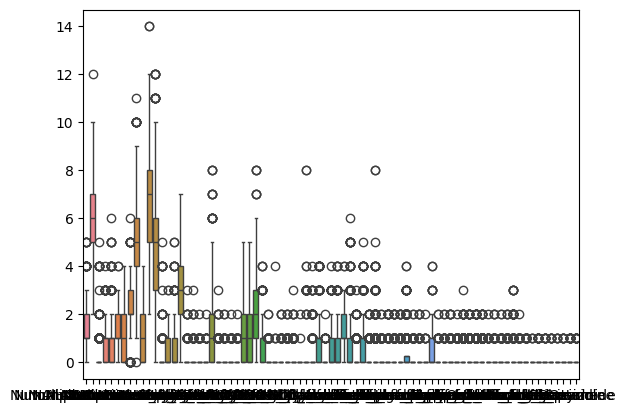

In [11]:
df_descriptors = df_descriptors.dropna()  # Delete all rows with missing values 
print(df_descriptors.describe())  # gives: mean, std, min, 25%, 505 75% and max values 

# Scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df_descriptors)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled, index=df_descriptors.index, columns=df_descriptors.columns)

# Applying PCA and finding the variance
pca = PCA()
pca.fit(df_scaled)
df_scaled.head()
sns.boxplot(data=df_fr)



In [6]:
z_scores = stats.zscore(df_descriptors)

threshold = 0.5
outlier = np.abs(z_scores) > threshold
df_outliers = df_molecules[outlier]
df_outliers = df_outliers.dropna(how='all')
df_outliers.head()


,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_urea,fr_Al_COO,fr_C_S,fr_Imine,fr_barbitur,fr_dihydropyridine,fr_guanido,fr_lactone,fr_oxazole,fr_priamide
0,NaN,5.313889,5.313889,NaN,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.785414,10.470588,250.681,239.593,250.039672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.441090,10.411765,232.239,220.143,232.084792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.012315,NaN,NaN,9.933333,226.663,215.575,226.050905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
